In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#70 CSV files (50 coordinates for each video) (35 visible + 35 IR videos)
TRAIN = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/train'

#30 CSV files (50 coordinates for each video) (15 visible + 15 IR videos)
TEST = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test'

**Model Inference on Testing Dataset:
Analysis of Individual Videos**

## n = 3

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained models
model_X = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_X_BiLSTM_32_n3.h5')
model_Y = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_Y_BiLSTM_32_n3.h5')

### V_DRONE_001.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_001.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 3

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00018
Root Mean Squared Error (RMSE): 0.01344
Mean Absolute Percentage Error (MAPE): 1.953%


In [ ]:
print("Shape of actual_coordinates:", actual_coordinates.shape)
print("Shape of predicted_coordinates_X:", predicted_coordinates.shape)

Shape of actual_coordinates: (47, 2)
Shape of predicted_coordinates_X: (47, 2)


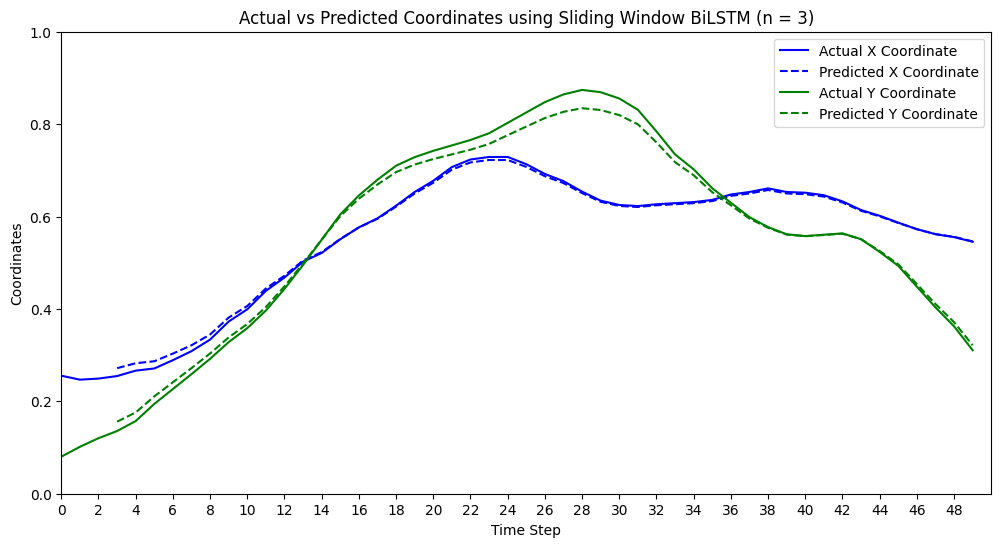

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 3)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_1_n3.png', transparent=True)

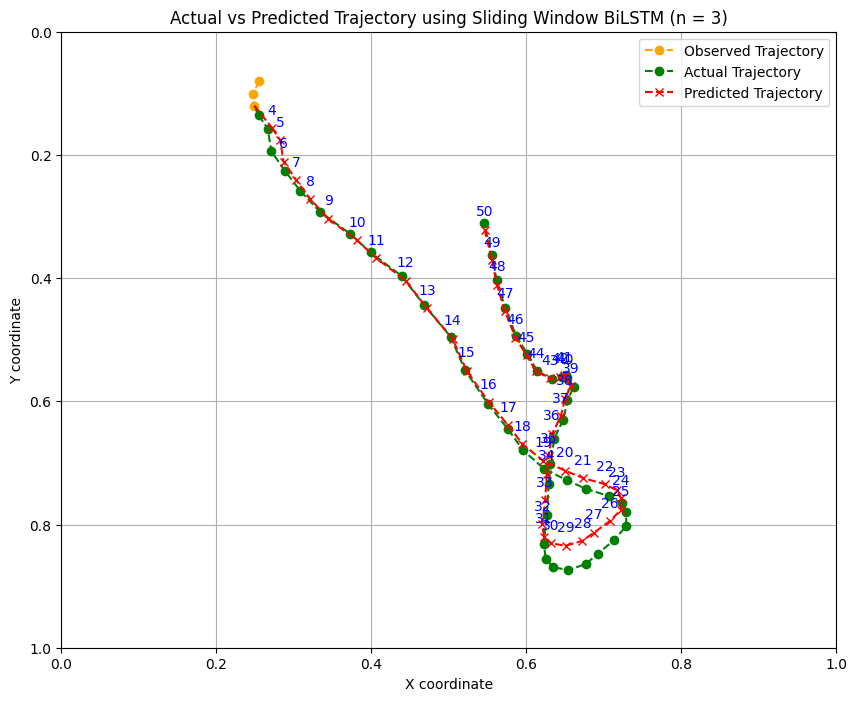

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=4):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_2_n3.png', transparent=True)

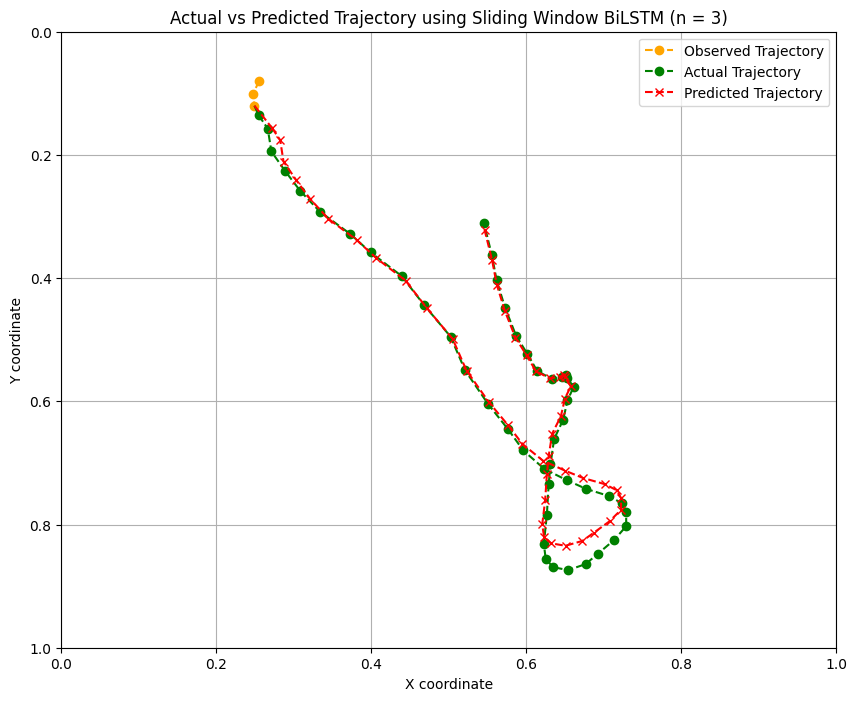

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_3_n3.png', transparent=True)

### V_DRONE_016.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_016.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 3

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 42ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00038
Root Mean Squared Error (RMSE): 0.01946
Mean Absolute Percentage Error (MAPE): 2.196%


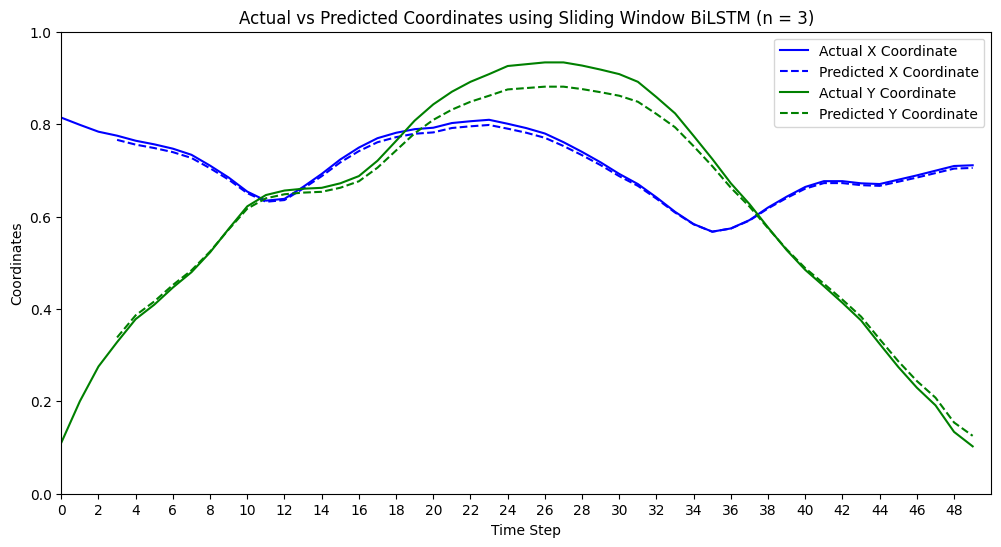

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 3)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_1_n3.png', transparent=True)

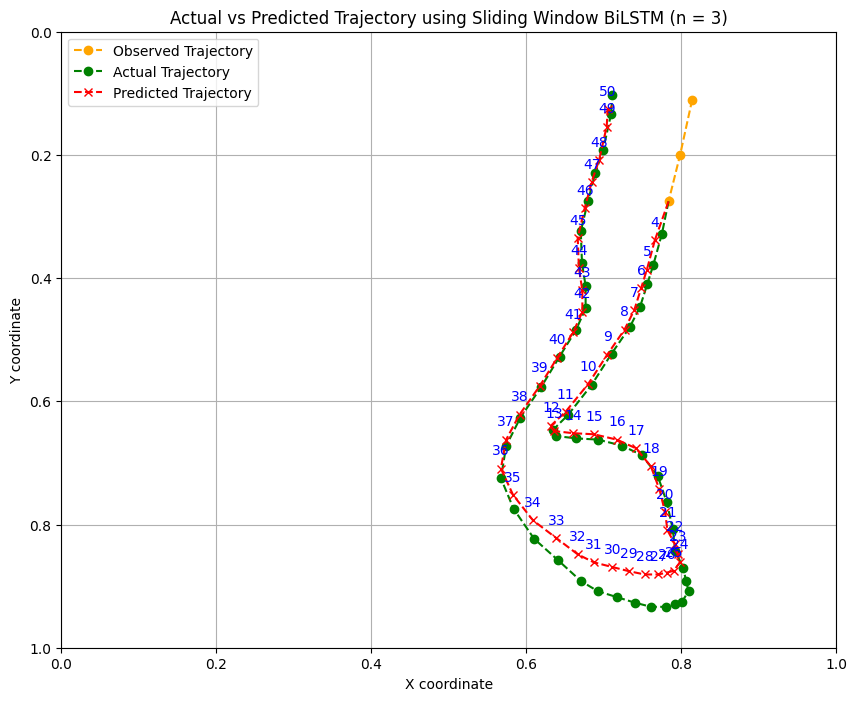

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=4):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_2_n3.png', transparent=True)

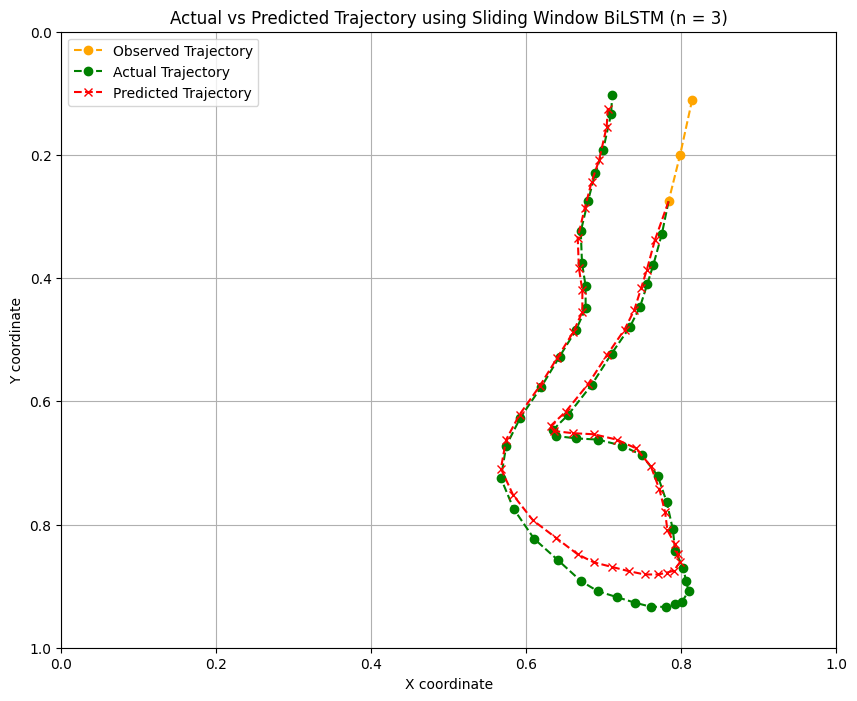

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_3_n3.png', transparent=True)

### IR_DRONE_095.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_095.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 3

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 39ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00009
Root Mean Squared Error (RMSE): 0.00965
Mean Absolute Percentage Error (MAPE): 2.770%


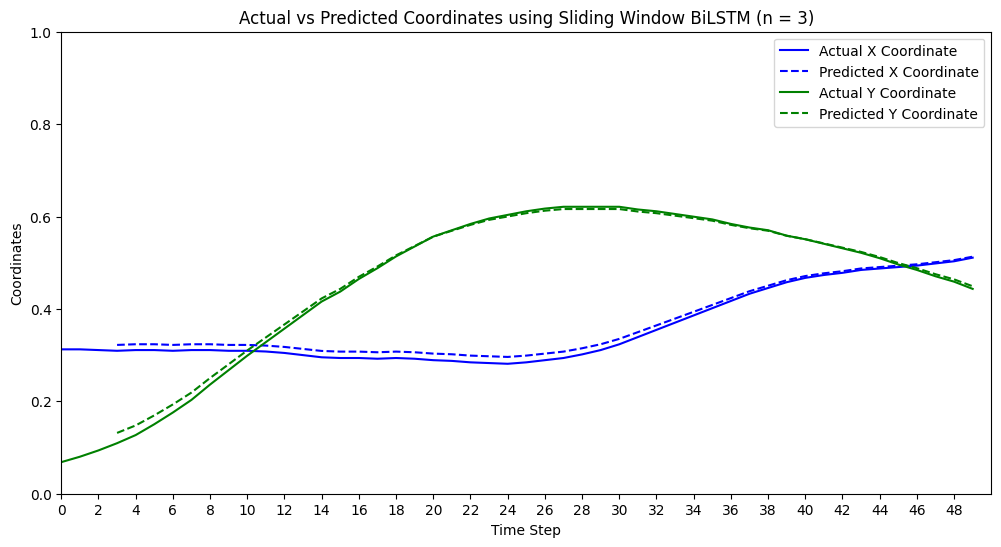

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 3)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_1_n3.png', transparent=True)

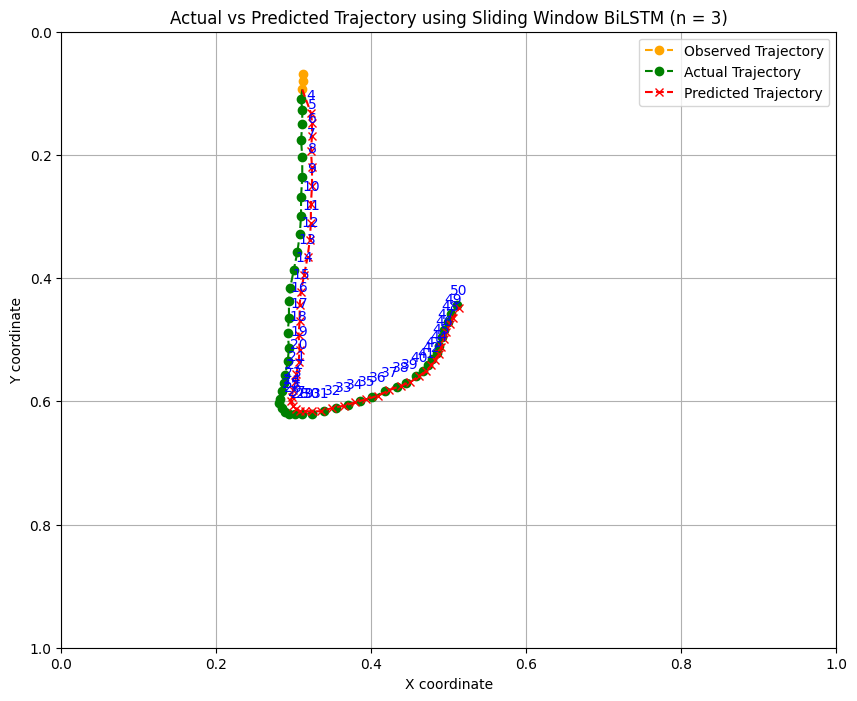

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=4):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_2_n3.png', transparent=True)

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_3_n3.png', transparent=True)

### IR_DRONE_128.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_128.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 3

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 41ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00006
Root Mean Squared Error (RMSE): 0.00745
Mean Absolute Percentage Error (MAPE): 1.687%


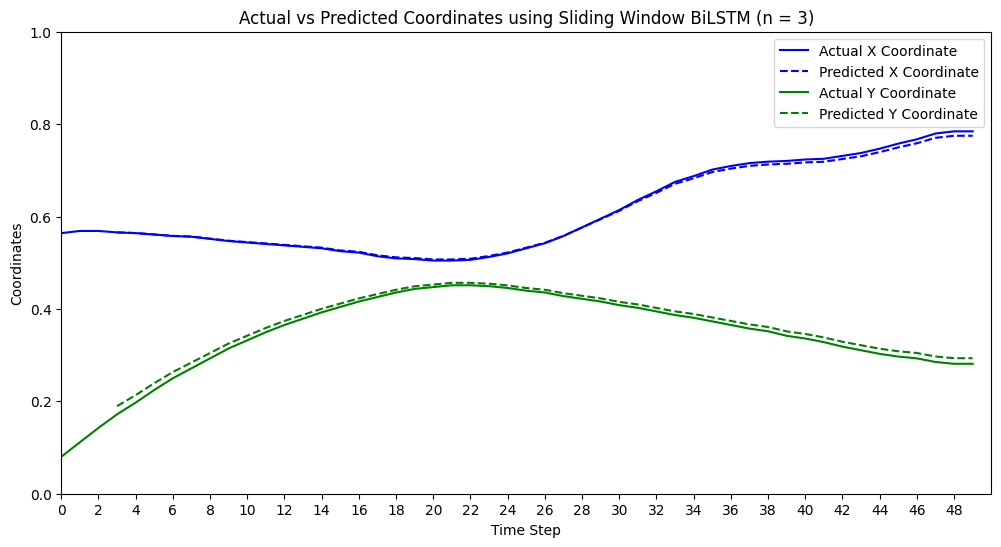

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 3)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_1_n3.png', transparent=True)

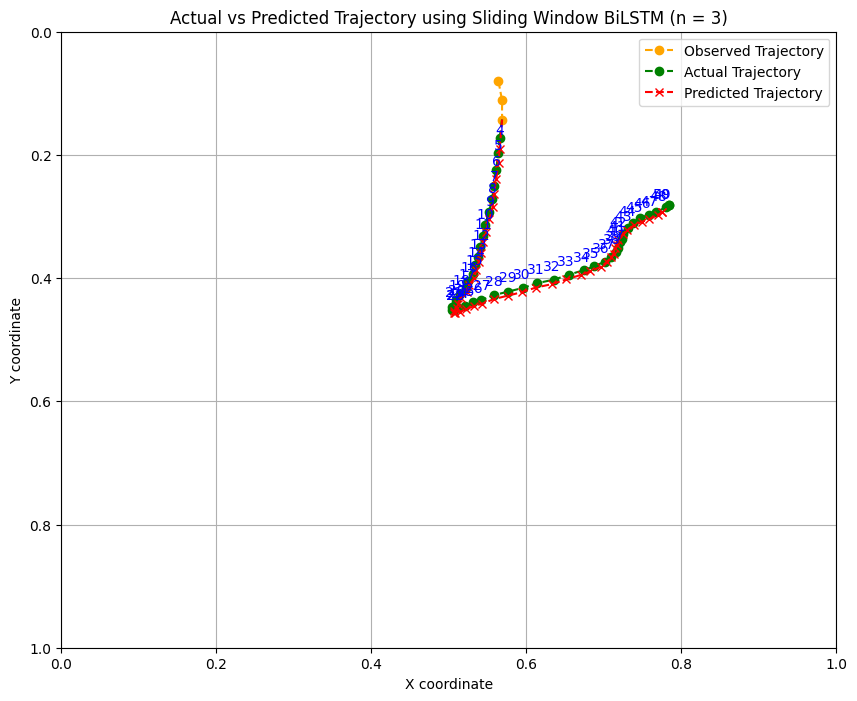

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=4):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_2_n3.png', transparent=True)

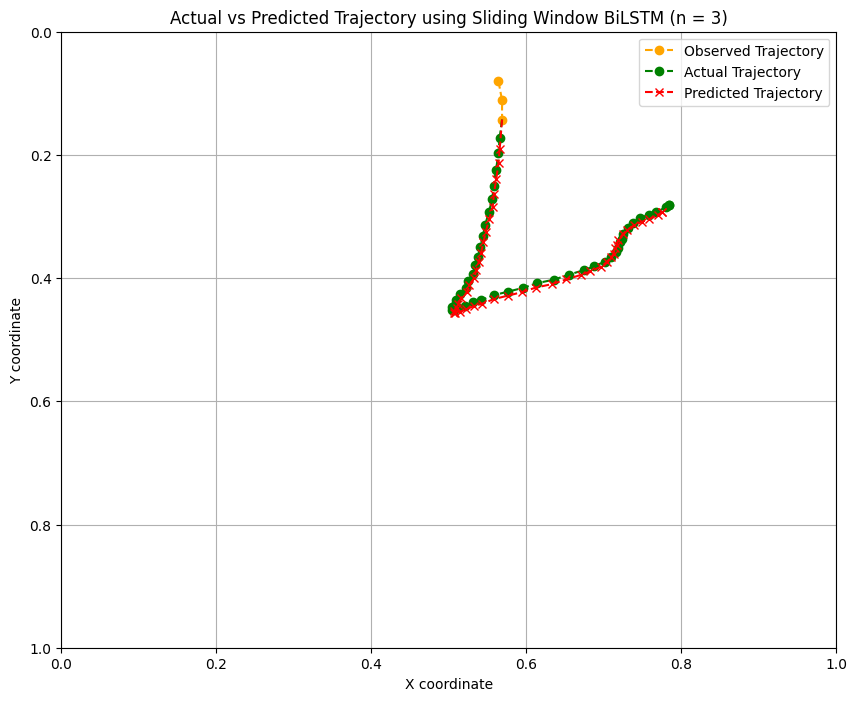

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:3], Y[:3], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[2:4], Y[2:4], color='green', linestyle='--')
plt.plot(X[3:], Y[3:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[2], predicted_X_coordinates[0]], [Y[2], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 3)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_3_n3.png', transparent=True)

## n = 6

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained models
model_X = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_X_BiLSTM_32_n6.h5')
model_Y = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_Y_BiLSTM_32_n6.h5')

### V_DRONE_001.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_001.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 6

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 38ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00431
Root Mean Squared Error (RMSE): 0.06566
Mean Absolute Percentage Error (MAPE): 10.098%


In [ ]:
print("Shape of actual_coordinates:", actual_coordinates.shape)
print("Shape of predicted_coordinates_X:", predicted_coordinates.shape)

Shape of actual_coordinates: (44, 2)
Shape of predicted_coordinates_X: (44, 2)


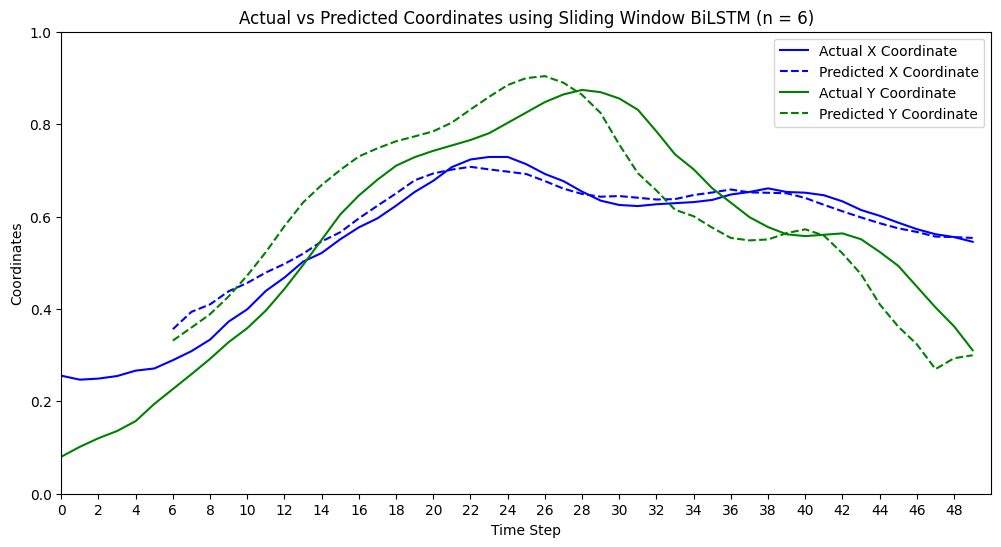

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 6)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_1_n6.png', transparent=True)

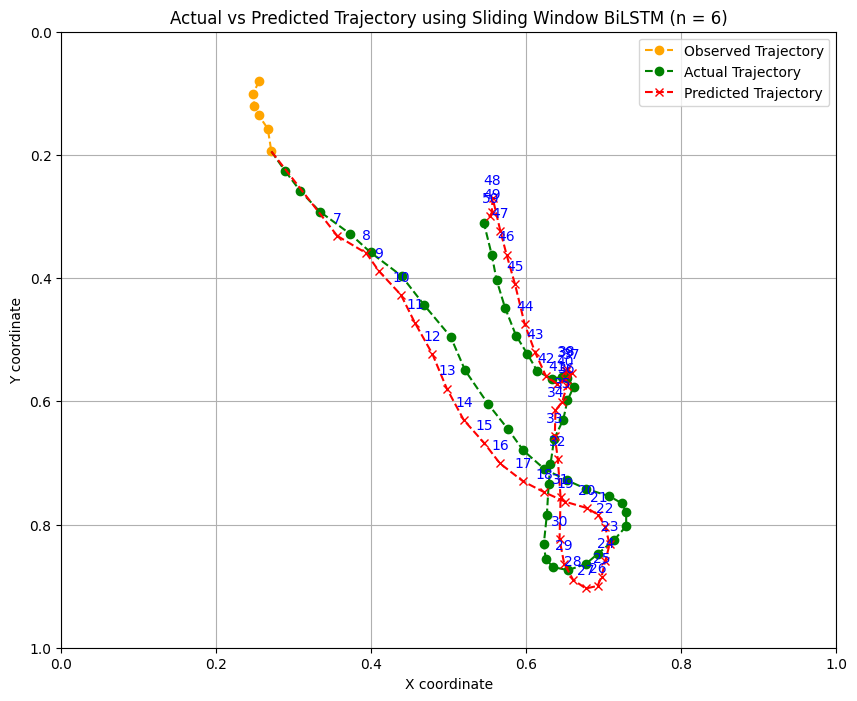

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=7):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_2_n6.png', transparent=True)

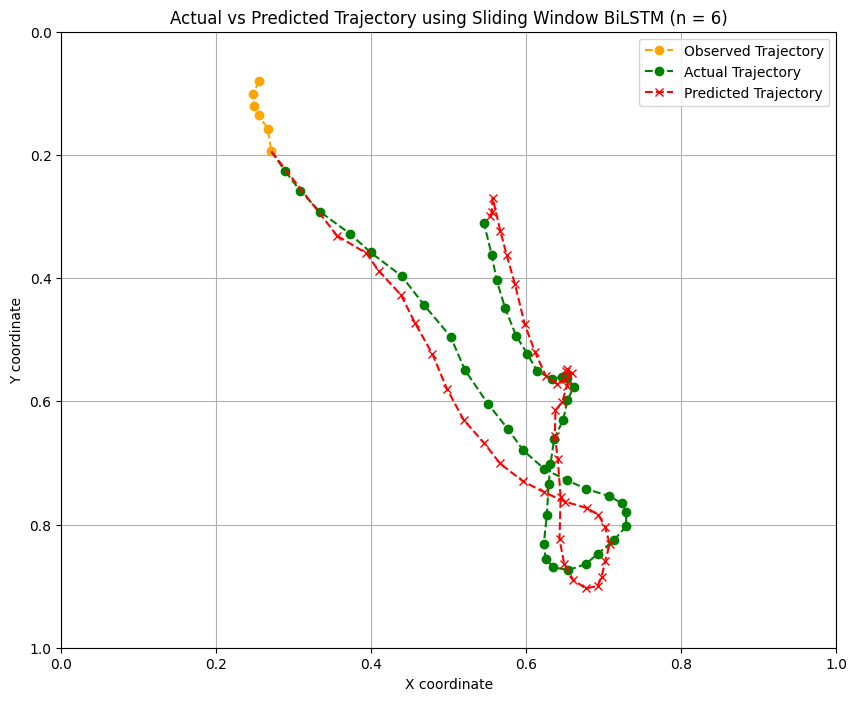

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_3_n6.png', transparent=True)

### V_DRONE_016.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_016.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 6

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 32ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00493
Root Mean Squared Error (RMSE): 0.07023
Mean Absolute Percentage Error (MAPE): 9.775%


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 6)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_1_n6.png', transparent=True)

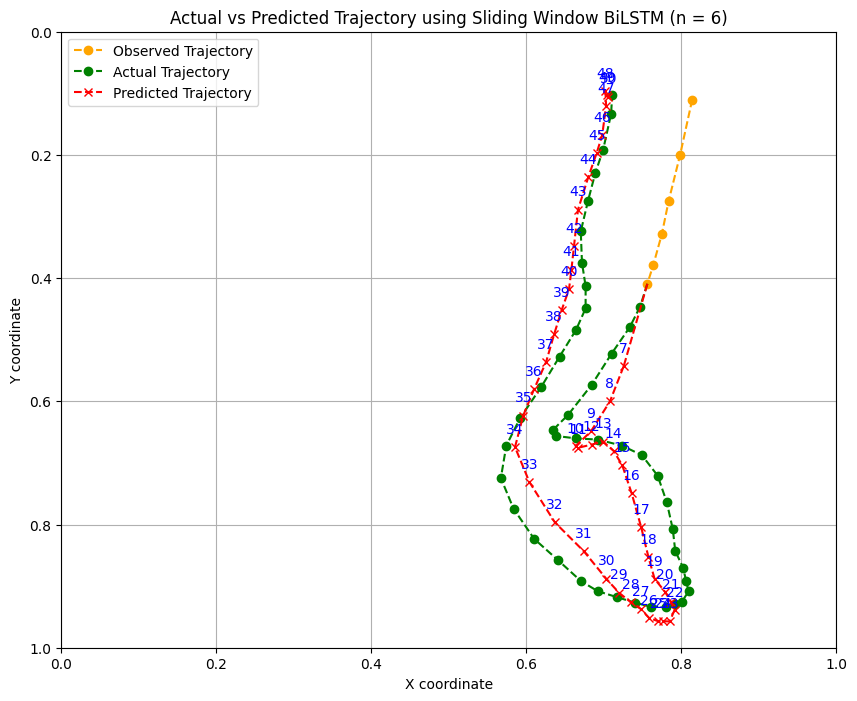

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=7):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_2_n6.png', transparent=True)

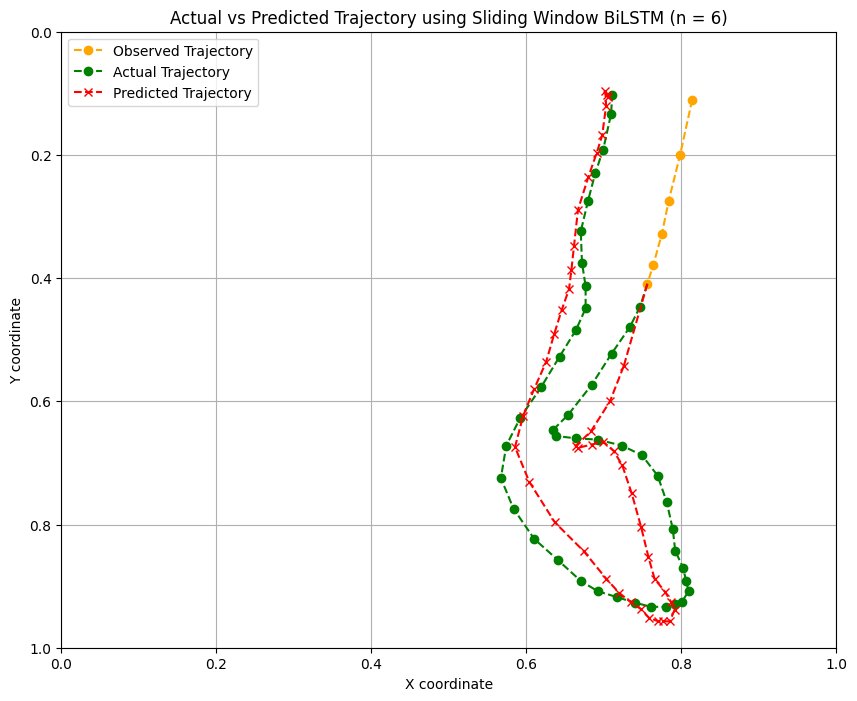

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_3_n6.png', transparent=True)

### IR_DRONE_095.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_095.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 6

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 33ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00152
Root Mean Squared Error (RMSE): 0.03898
Mean Absolute Percentage Error (MAPE): 8.190%


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 6)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_1_n6.png', transparent=True)

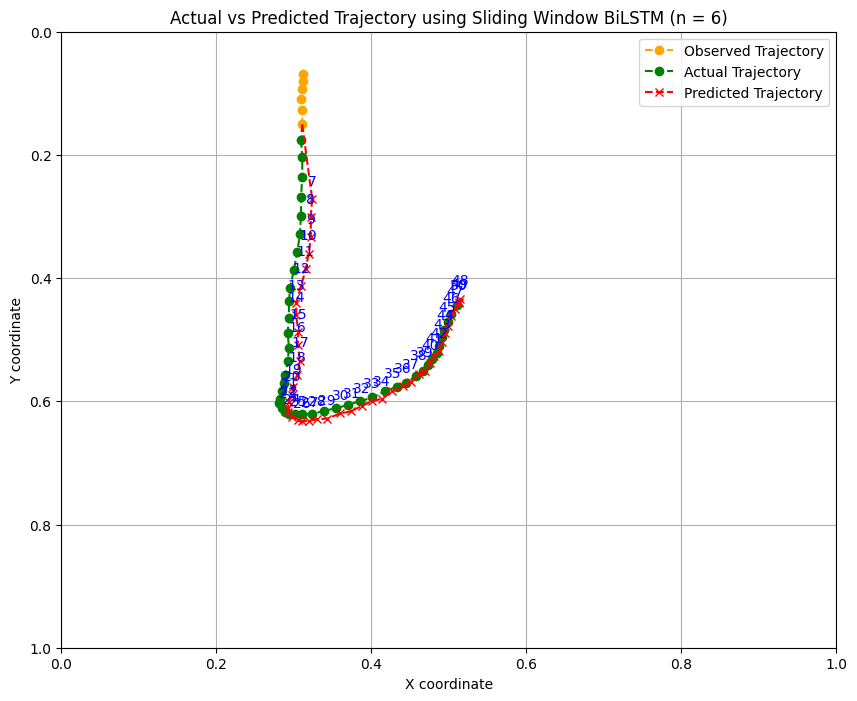

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=7):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_2_n6.png', transparent=True)

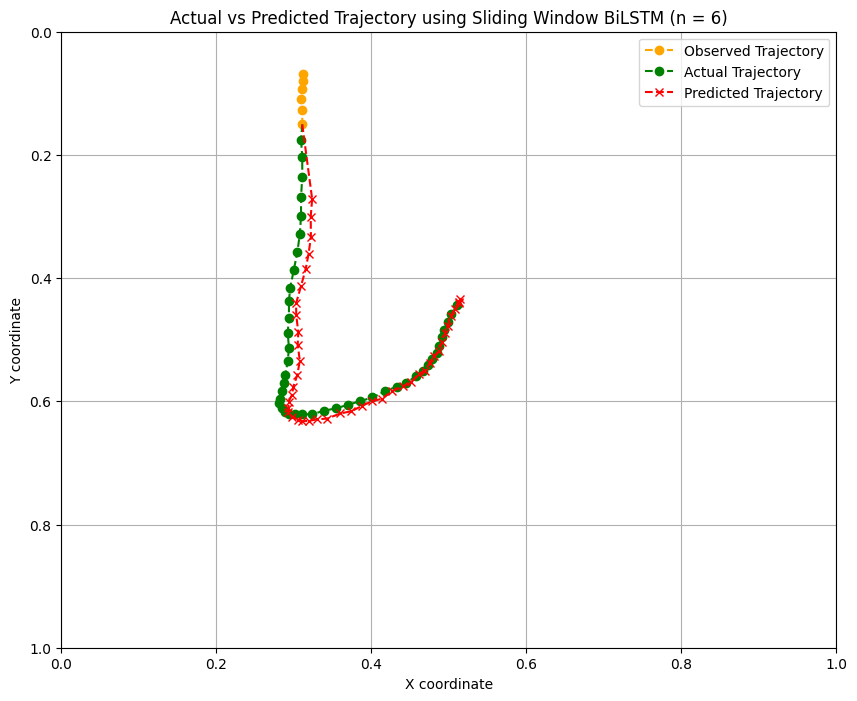

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_3_n6.png', transparent=True)

### IR_DRONE_128.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_128.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 6

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 40ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00051
Root Mean Squared Error (RMSE): 0.02264
Mean Absolute Percentage Error (MAPE): 4.449%


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 6)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_1_n6.png', transparent=True)

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

## Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=7):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_2_n6.png', transparent=True)

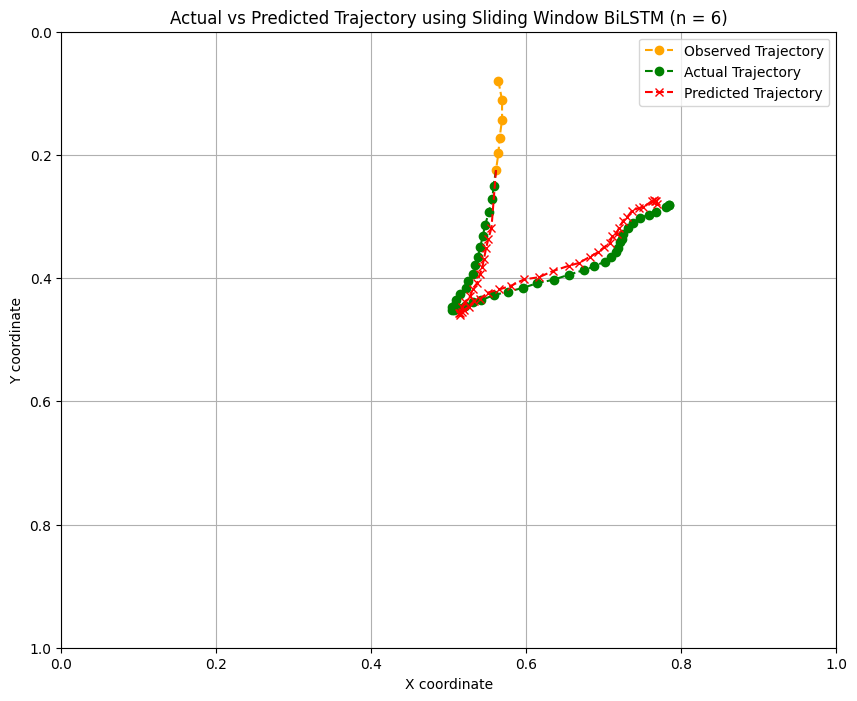

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:6], Y[:6], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[5:7], Y[5:7], color='green', linestyle='--')
plt.plot(X[6:], Y[6:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[5], predicted_X_coordinates[0]], [Y[5], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 6)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_3_n6.png', transparent=True)

## n = 9

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained models
model_X = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_X_BiLSTM_32_n9.h5')
model_Y = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_Y_BiLSTM_32_n9.h5')

### V_DRONE_001.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_001.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 9

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 32ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00399
Root Mean Squared Error (RMSE): 0.06313
Mean Absolute Percentage Error (MAPE): 9.257%


In [ ]:
print("Shape of actual_coordinates:", actual_coordinates.shape)
print("Shape of predicted_coordinates_X:", predicted_coordinates.shape)

Shape of actual_coordinates: (41, 2)
Shape of predicted_coordinates_X: (41, 2)


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 9)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_1_n9.png', transparent=True)

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=10):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_2_n9.png', transparent=True)

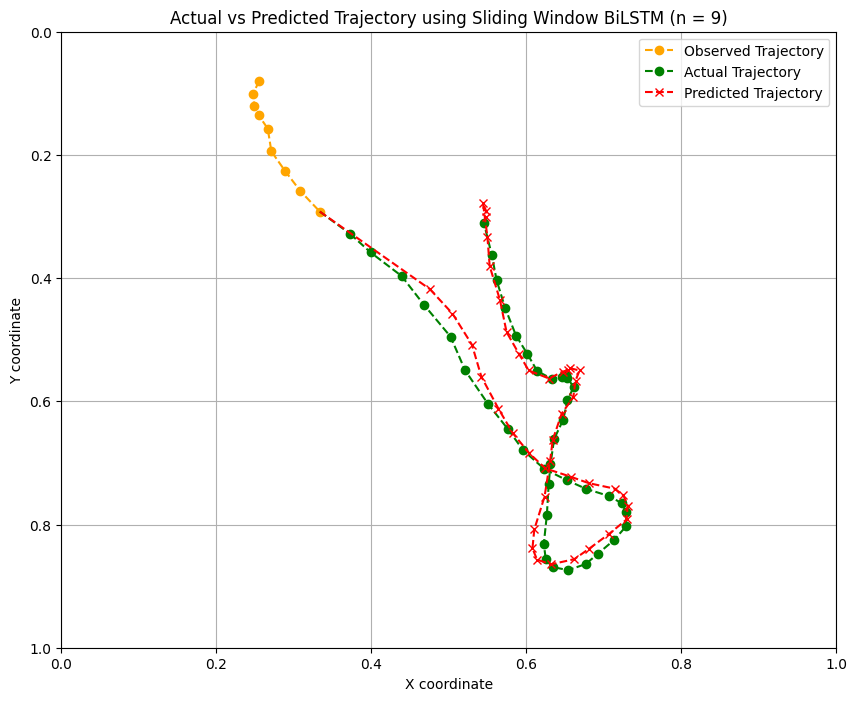

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_3_n9.png', transparent=True)

### V_DRONE_016.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_016.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 9

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 37ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00441
Root Mean Squared Error (RMSE): 0.06643
Mean Absolute Percentage Error (MAPE): 9.501%


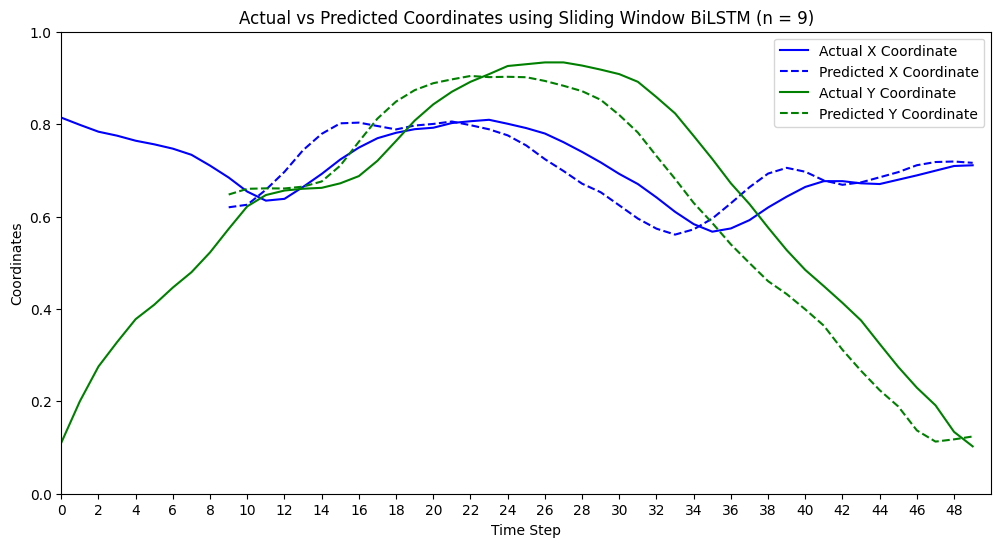

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 9)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_1_n9.png', transparent=True)

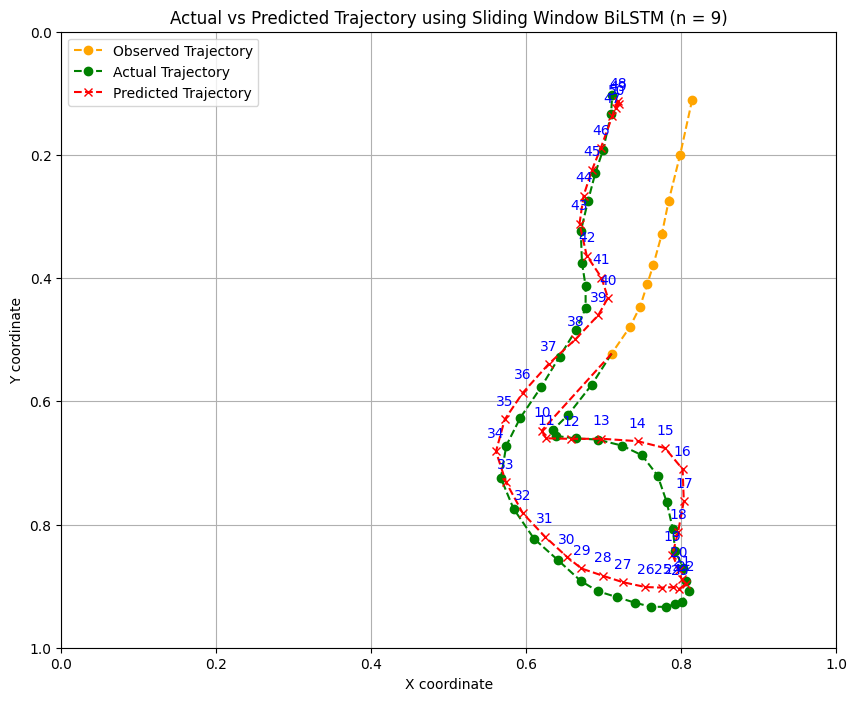

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=10):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_2_n9.png', transparent=True)

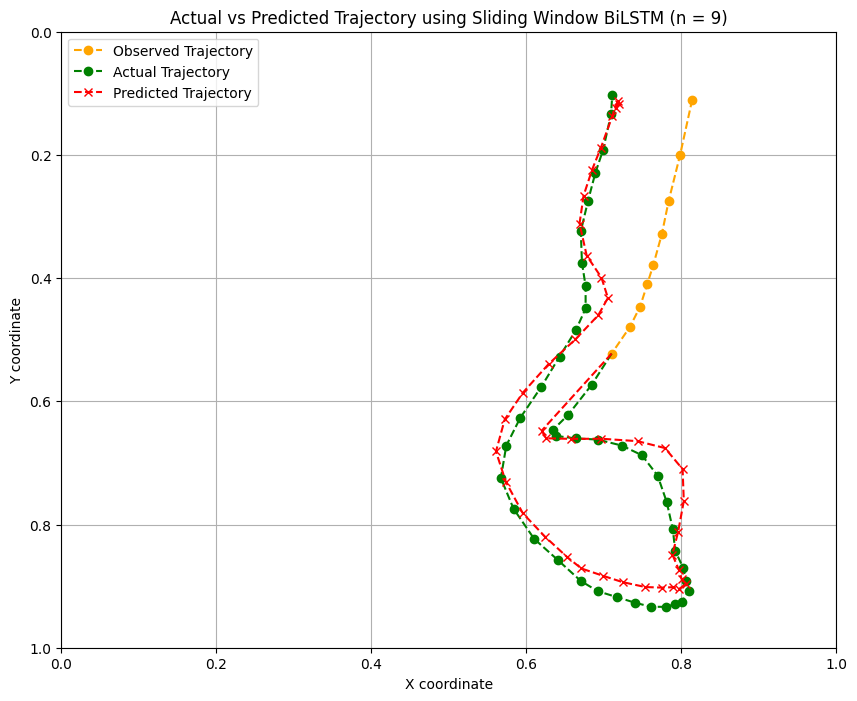

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_3_n9.png', transparent=True)

### IR_DRONE_095.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_095.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 9

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 40ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00110
Root Mean Squared Error (RMSE): 0.03313
Mean Absolute Percentage Error (MAPE): 6.254%


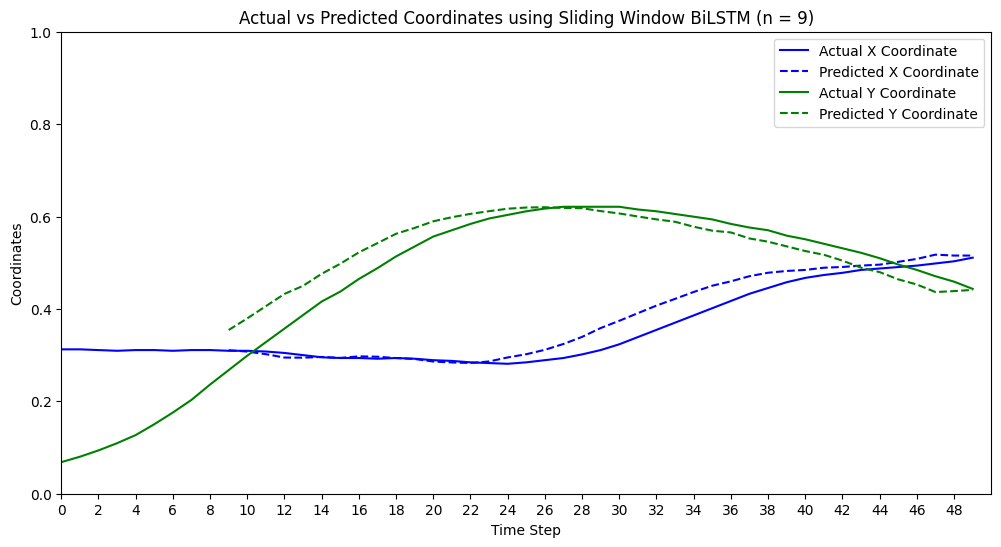

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 9)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_1_n9.png', transparent=True)

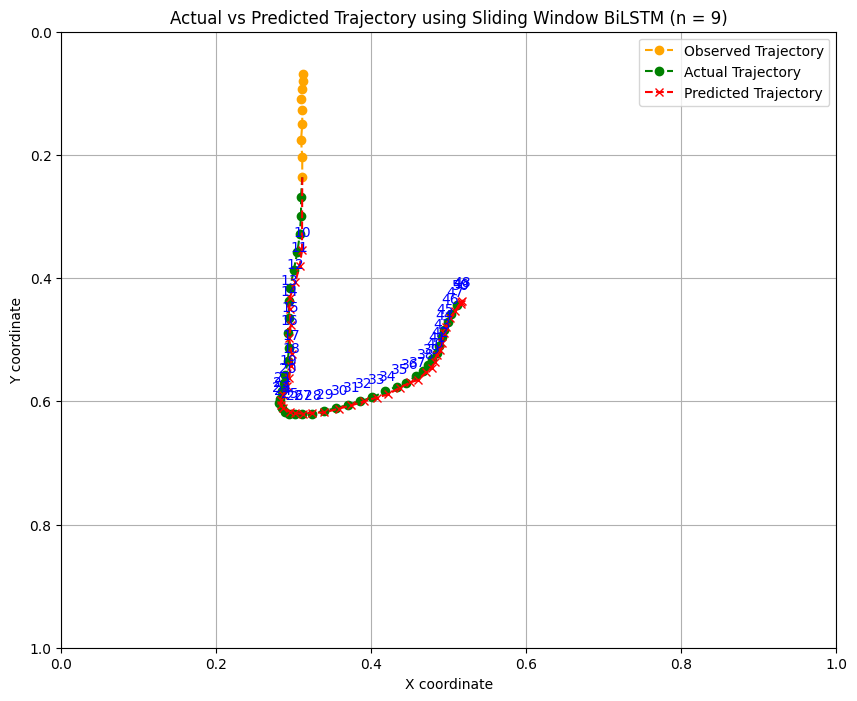

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=10):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_2_n9.png', transparent=True)

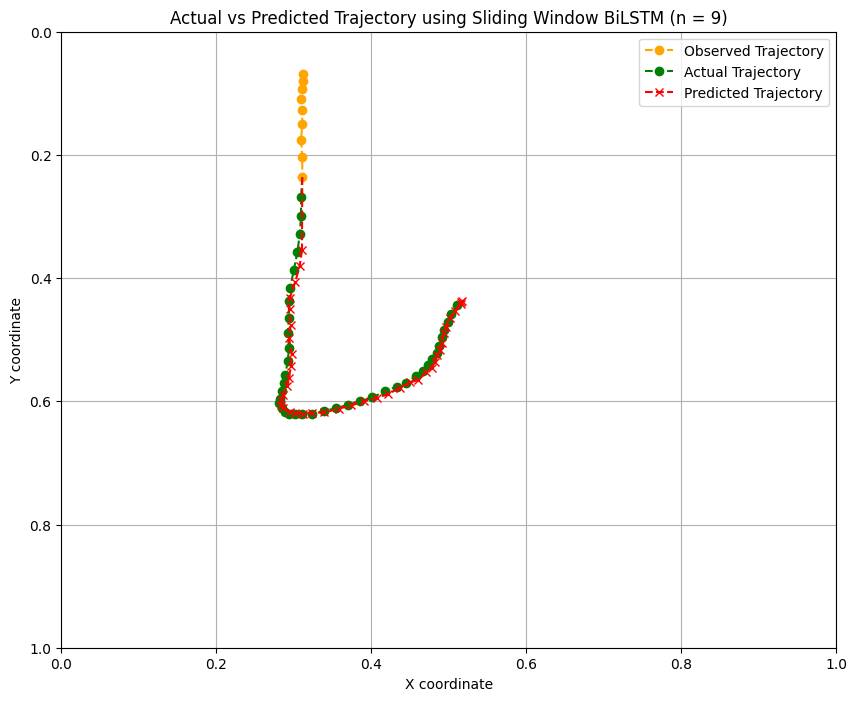

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_3_n9.png', transparent=True)

### IR_DRONE_128.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_128.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 9

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 33ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00059
Root Mean Squared Error (RMSE): 0.02435
Mean Absolute Percentage Error (MAPE): 4.211%


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 9)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_1_n9.png', transparent=True)

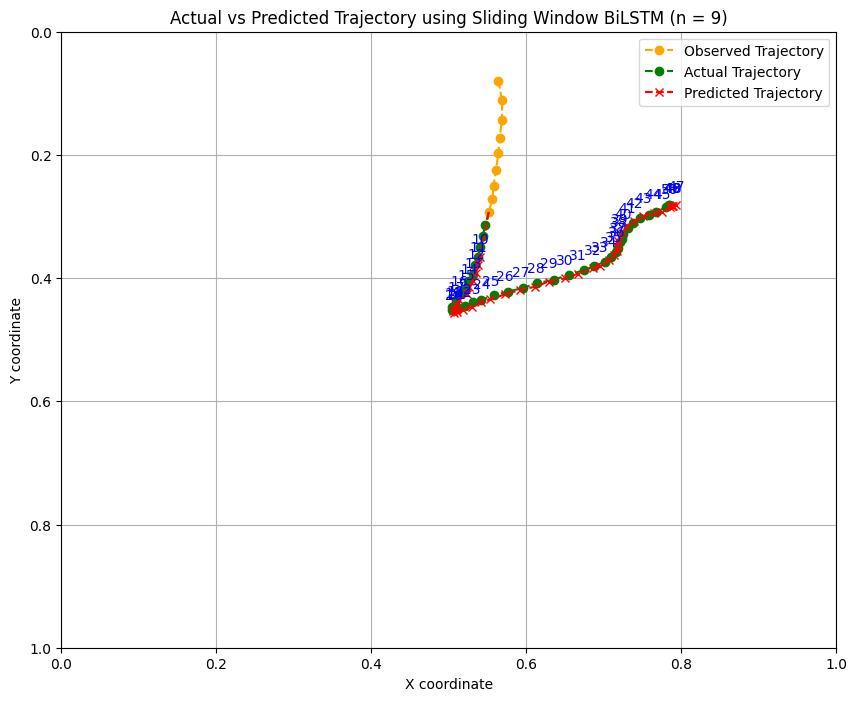

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=10):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_2_n9.png', transparent=True)

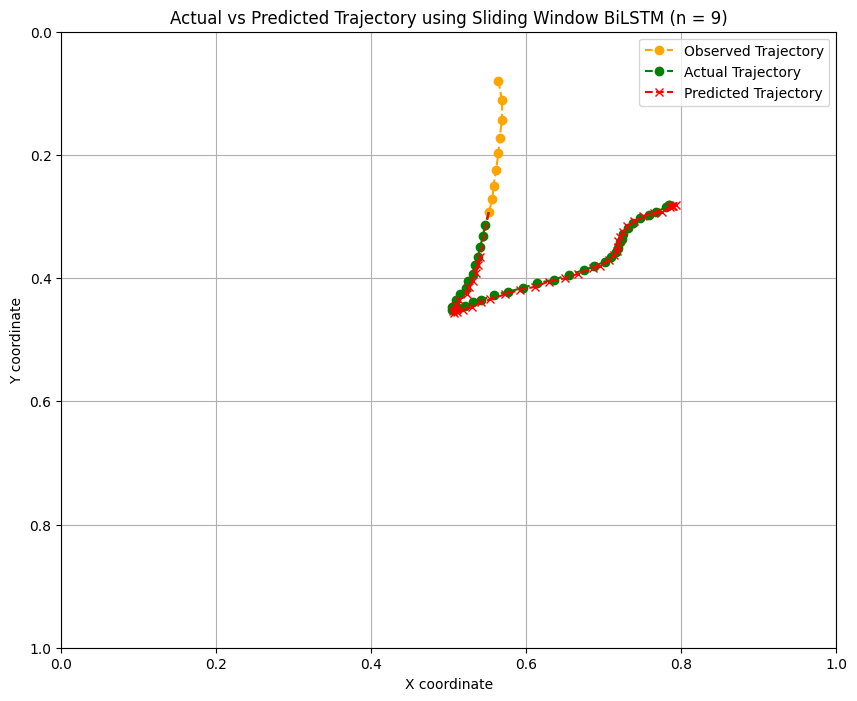

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:9], Y[:9], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[8:10], Y[8:10], color='green', linestyle='--')
plt.plot(X[9:], Y[9:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[8], predicted_X_coordinates[0]], [Y[8], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 9)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_3_n9.png', transparent=True)

## n = 12

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained models
model_X = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_X_BiLSTM_32_n12.h5')
model_Y = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_Y_BiLSTM_32_n12.h5')

### V_DRONE_001.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_001.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 12

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 32ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00359
Root Mean Squared Error (RMSE): 0.05990
Mean Absolute Percentage Error (MAPE): 7.879%


In [ ]:
print("Shape of actual_coordinates:", actual_coordinates.shape)
print("Shape of predicted_coordinates_X:", predicted_coordinates.shape)

Shape of actual_coordinates: (38, 2)
Shape of predicted_coordinates_X: (38, 2)


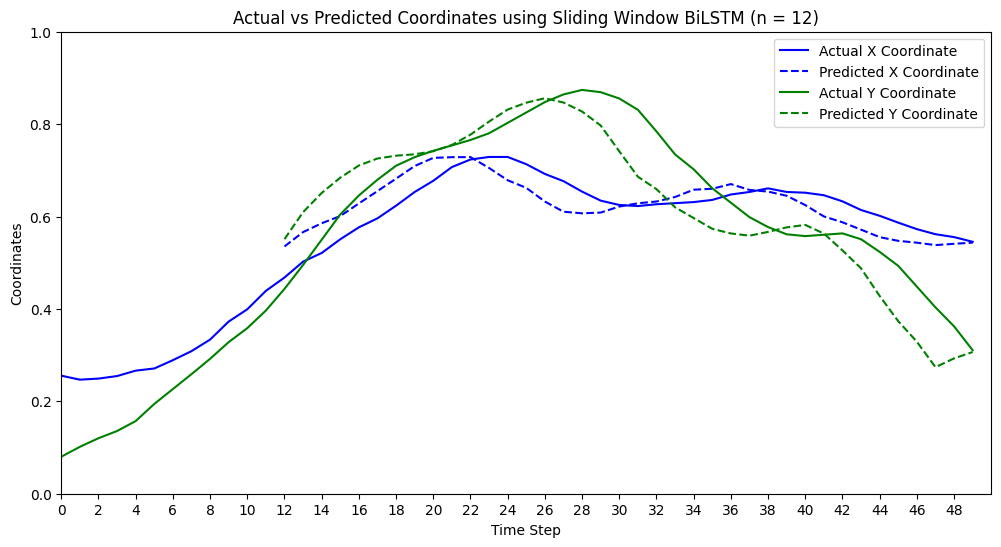

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 12)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_1_n12.png', transparent=True)

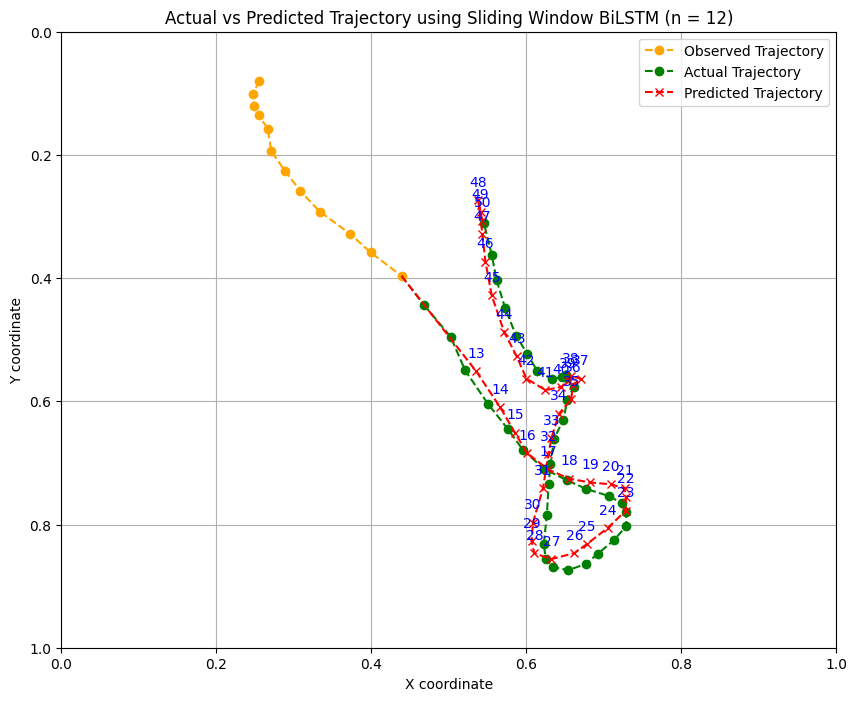

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=13):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_2_n12.png', transparent=True)

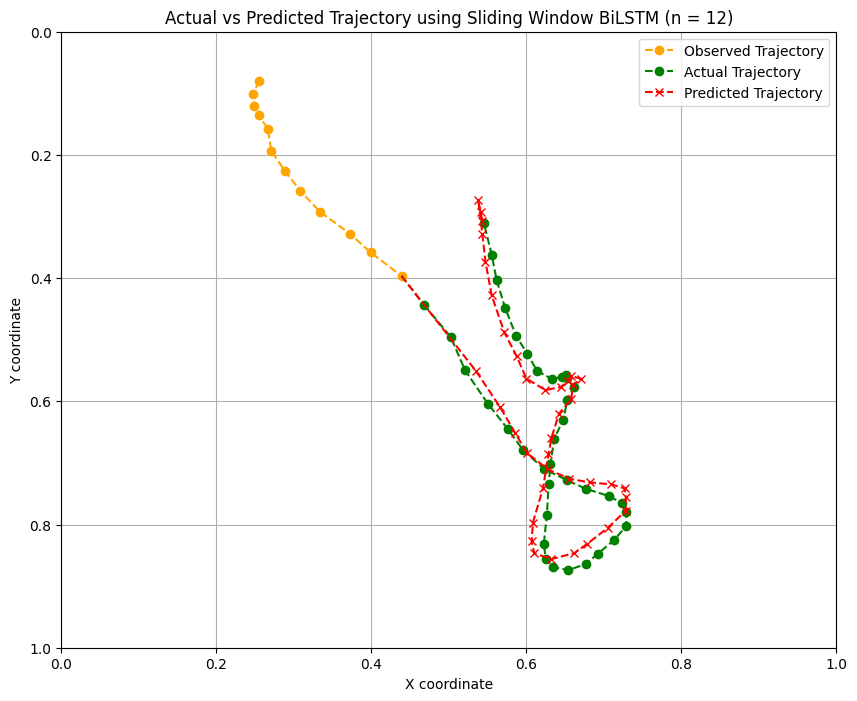

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_3_n12.png', transparent=True)

### V_DRONE_016.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_016.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 12

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 35ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00434
Root Mean Squared Error (RMSE): 0.06588
Mean Absolute Percentage Error (MAPE): 9.441%


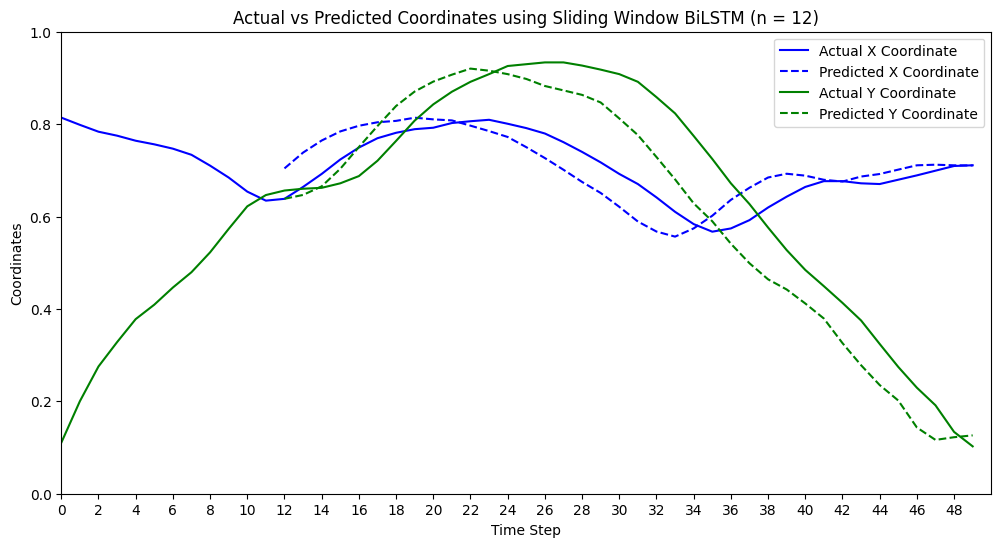

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 12)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_1_n12.png', transparent=True)

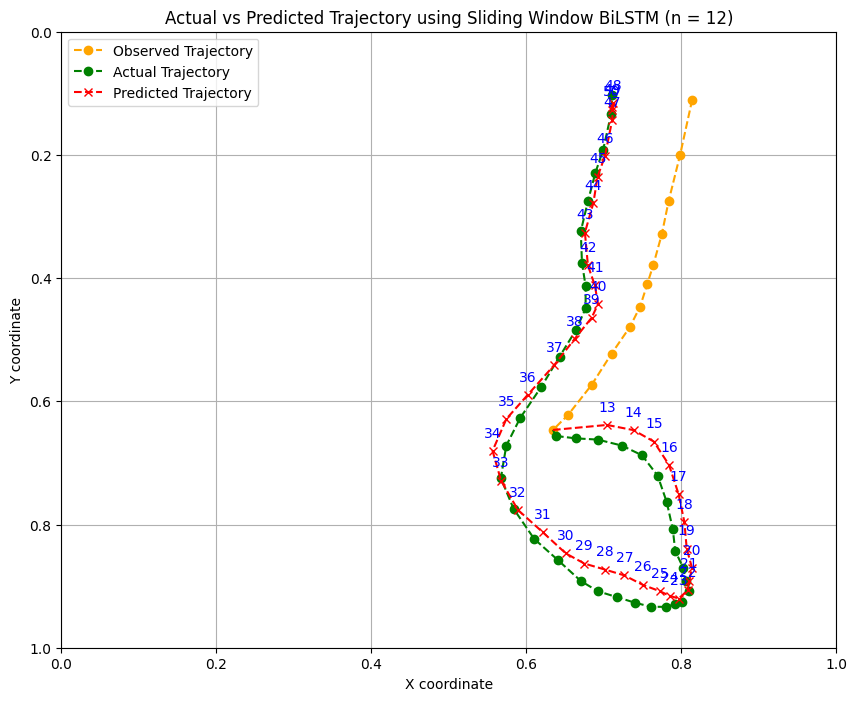

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=13):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_2_n12.png', transparent=True)

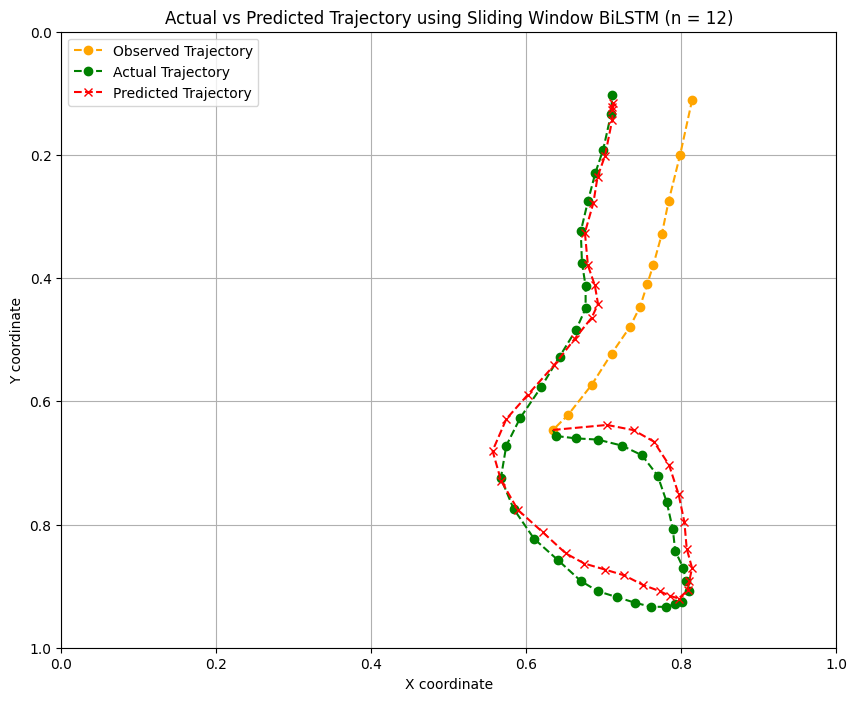

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_3_n12.png', transparent=True)

### IR_DRONE_095.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_095.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 12

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 38ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00061
Root Mean Squared Error (RMSE): 0.02466
Mean Absolute Percentage Error (MAPE): 4.733%


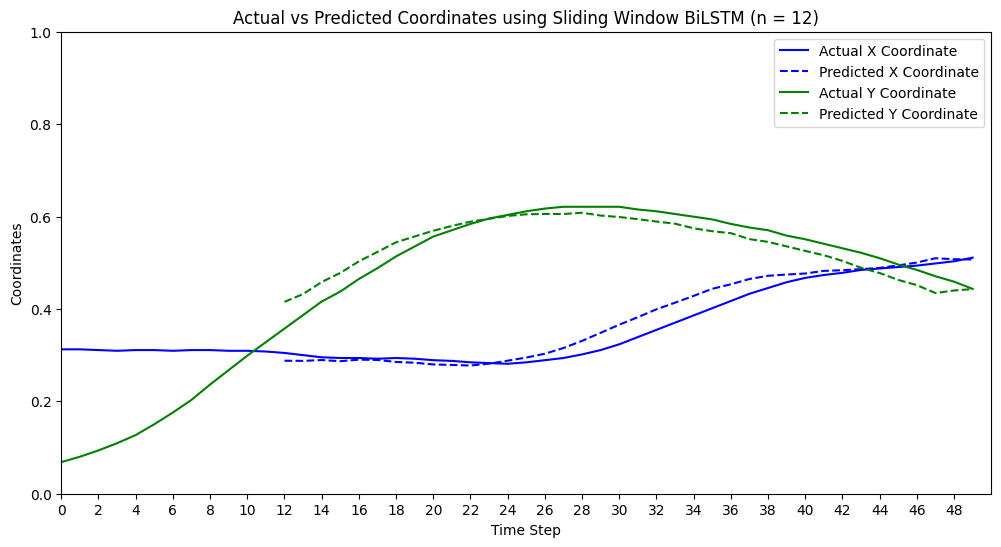

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 12)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_1_n12.png', transparent=True)

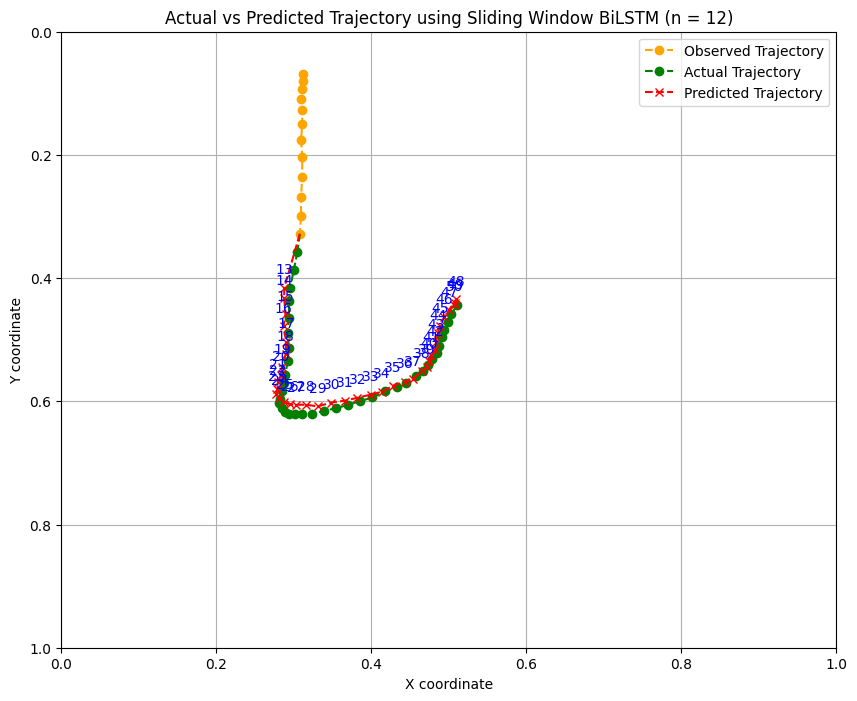

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=13):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_2_n12.png', transparent=True)

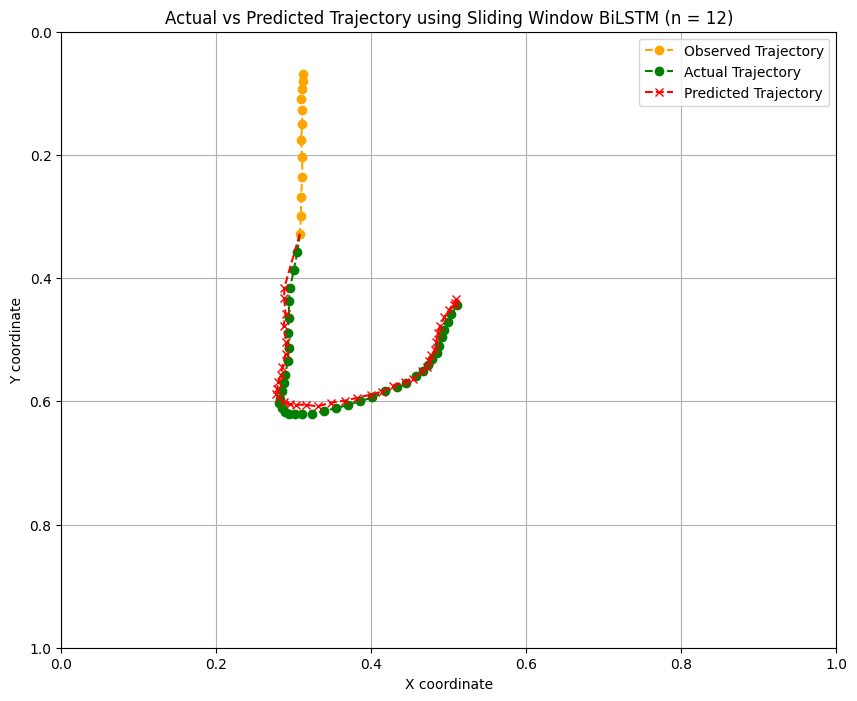

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_3_n12.png', transparent=True)

### IR_DRONE_128.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_128.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 12

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 31ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00057
Root Mean Squared Error (RMSE): 0.02393
Mean Absolute Percentage Error (MAPE): 4.340%


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 12)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_1_n12.png', transparent=True)

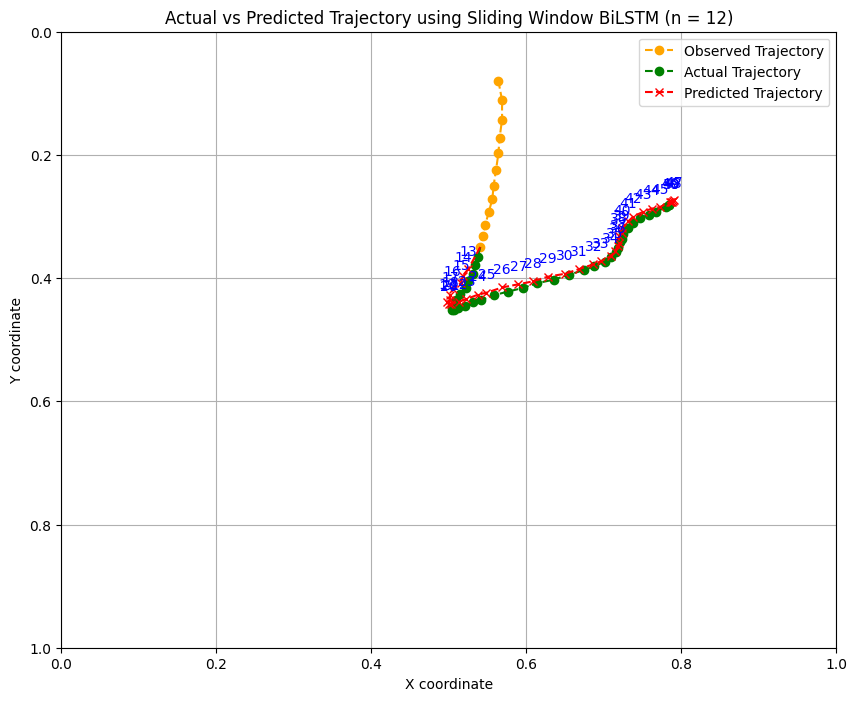

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=13):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_2_n12.png', transparent=True)

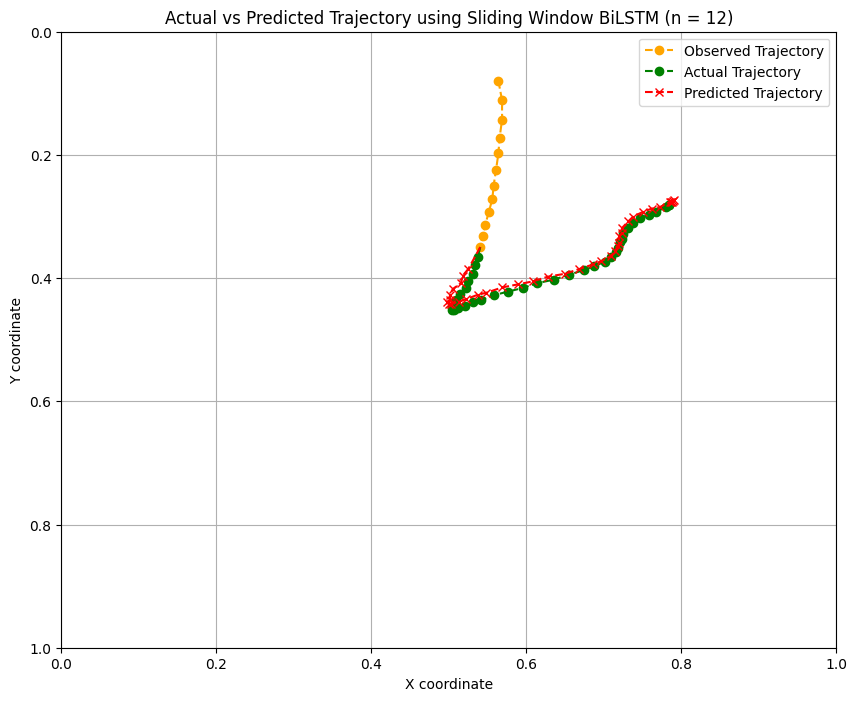

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:12], Y[:12], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[11:13], Y[11:13], color='green', linestyle='--')
plt.plot(X[12:], Y[12:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[11], predicted_X_coordinates[0]], [Y[11], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 12)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_3_n12.png', transparent=True)

## n = 15

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained models
model_X = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_X_BiLSTM_32_n15.h5')
model_Y = load_model('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/weight/model_Y_BiLSTM_32_n15.h5')

### V_DRONE_001.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_001.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 15

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00369
Root Mean Squared Error (RMSE): 0.06071
Mean Absolute Percentage Error (MAPE): 7.698%


In [ ]:
print("Shape of actual_coordinates:", actual_coordinates.shape)
print("Shape of predicted_coordinates_X:", predicted_coordinates.shape)

Shape of actual_coordinates: (35, 2)
Shape of predicted_coordinates_X: (35, 2)


In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 15)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_1_n15.png', transparent=True)

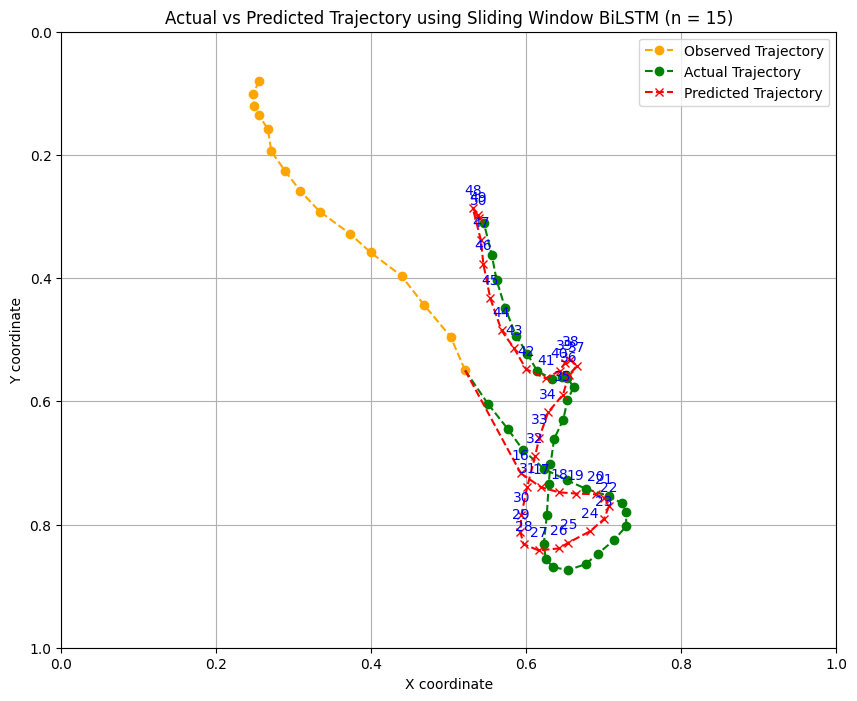

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=16):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_2_n15.png', transparent=True)

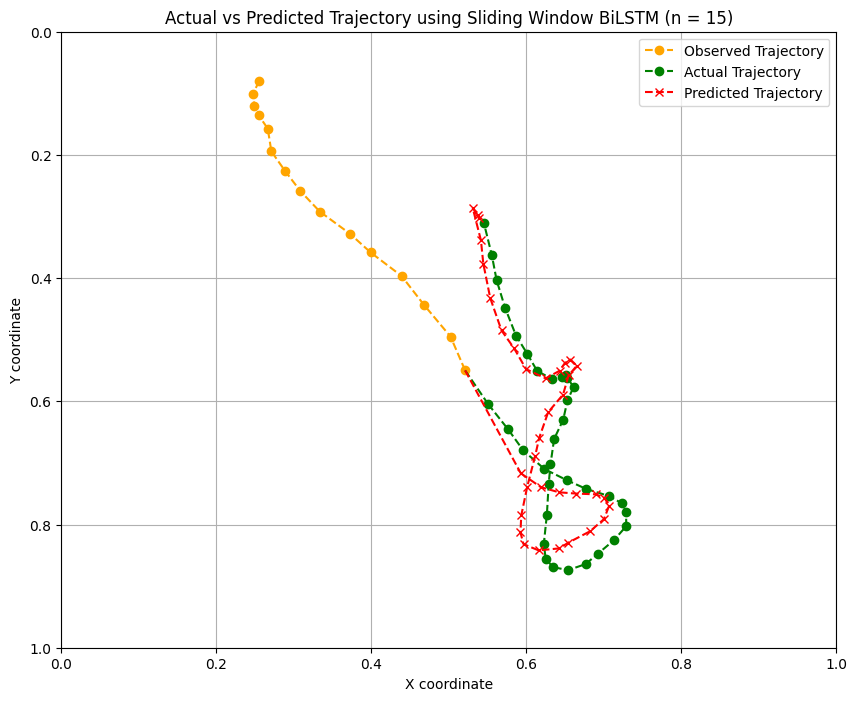

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_001_3_n15.png', transparent=True)

### V_DRONE_016.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/V_DRONE_016.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 15

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 35ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00495
Root Mean Squared Error (RMSE): 0.07037
Mean Absolute Percentage Error (MAPE): 9.779%


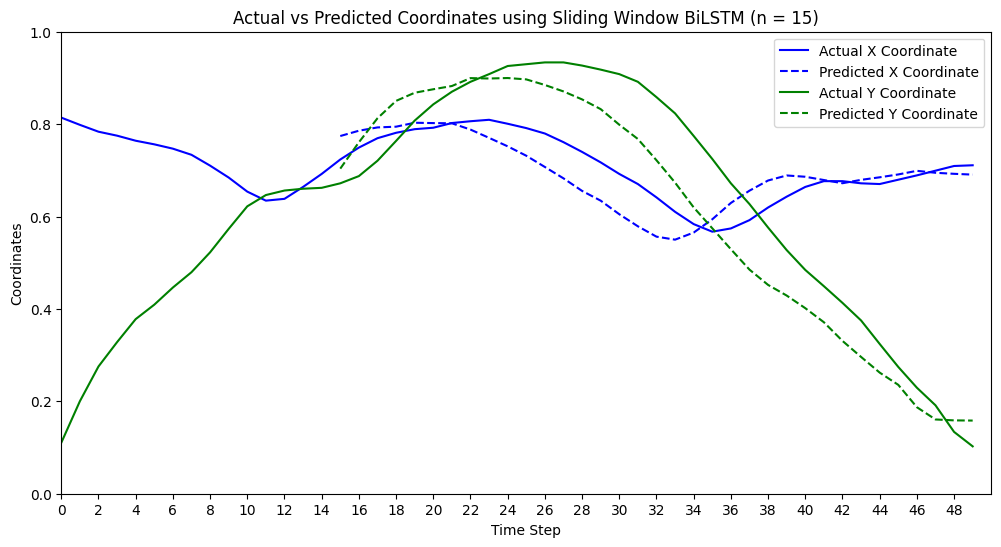

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 15)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_1_n15.png', transparent=True)

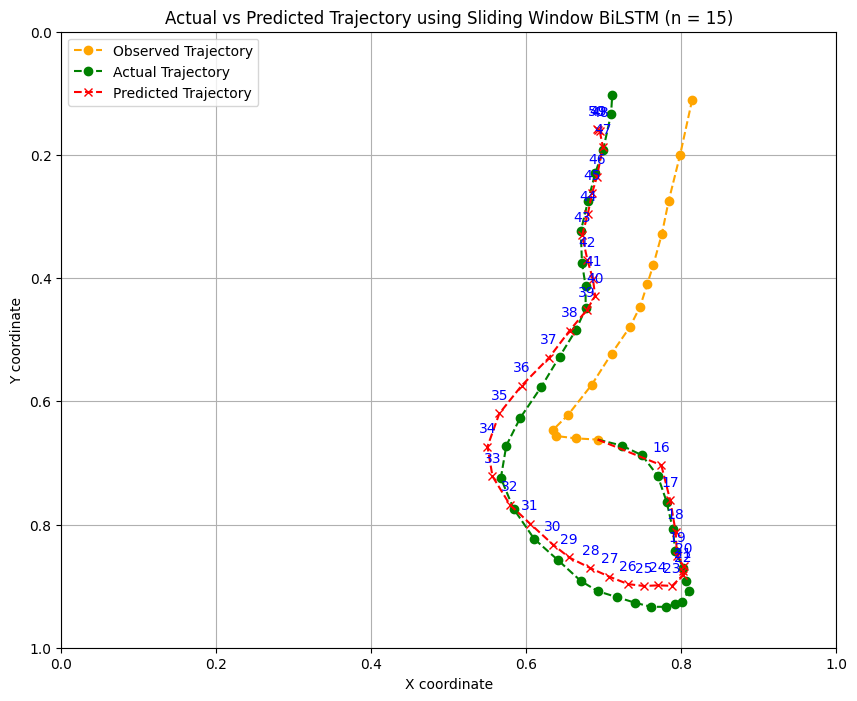

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=16):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_2_n15.png', transparent=True)

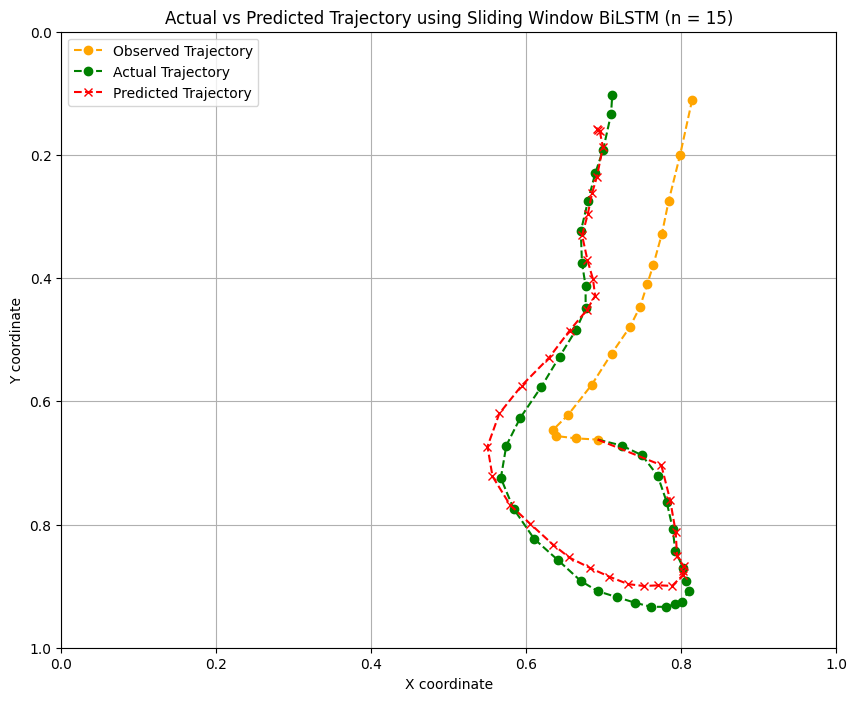

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/V_016_3_n15.png', transparent=True)

### IR_DRONE_095.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_095.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 15

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00064
Root Mean Squared Error (RMSE): 0.02521
Mean Absolute Percentage Error (MAPE): 4.855%


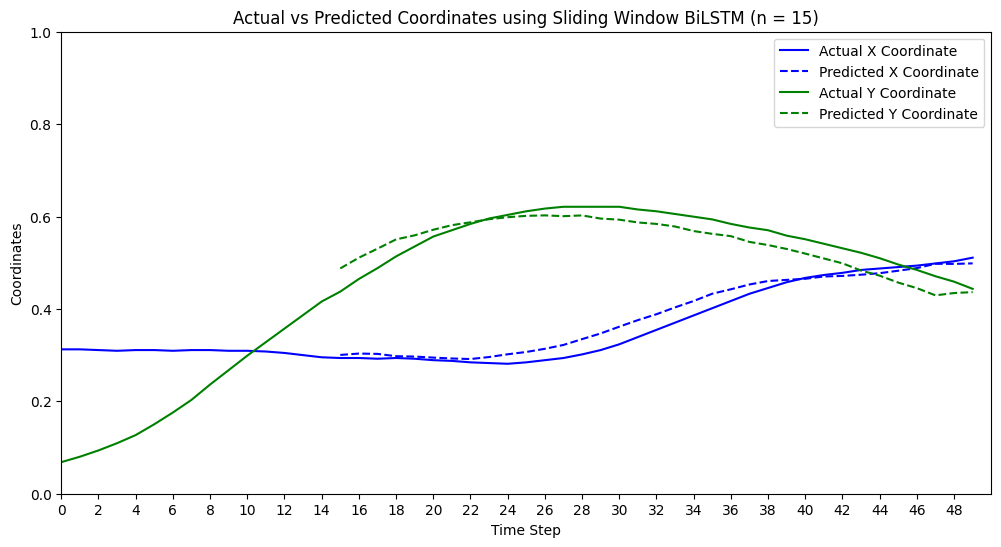

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 15)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_1_n15.png', transparent=True)

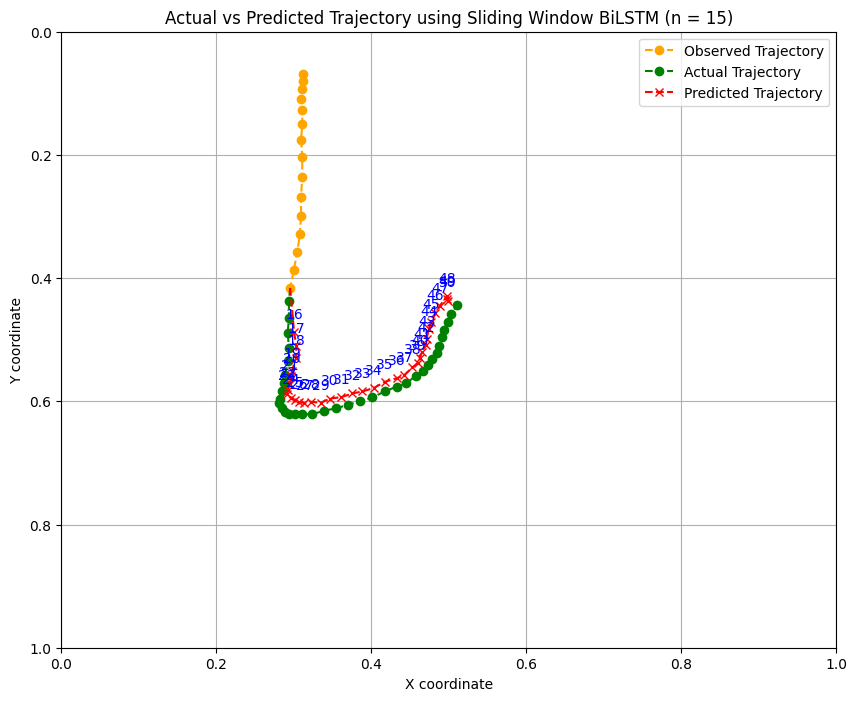

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=16):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_2_n15.png', transparent=True)

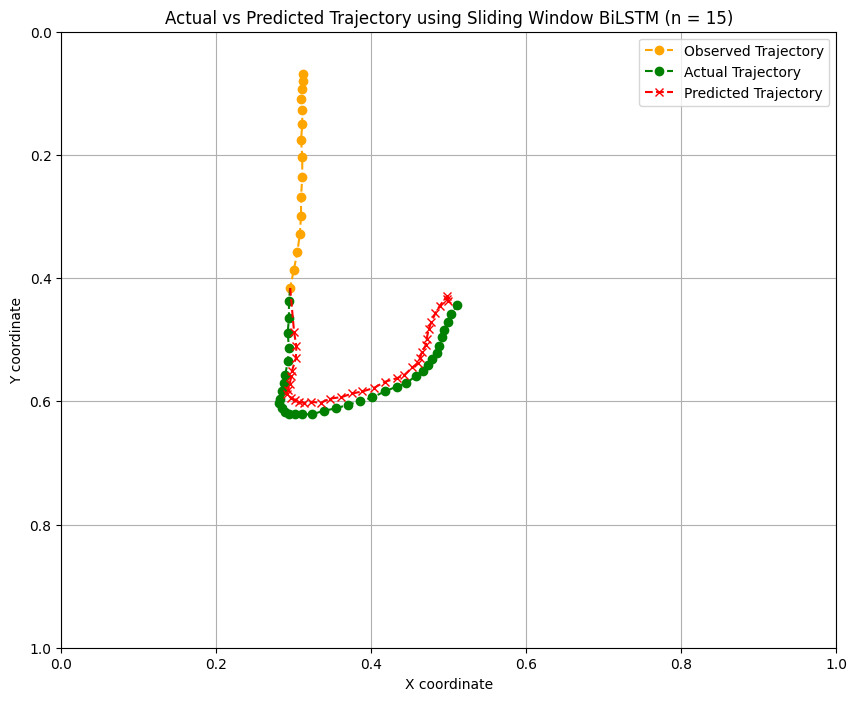

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_095_3_n15.png', transparent=True)

### IR_DRONE_128.mp4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Load the CSV file for the specified video
csv_file_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/test/IR_DRONE_128.csv'
df = pd.read_csv(csv_file_path)

# Extract true X and Y coordinates from the CSV file
X = df['x_center'].values
Y = df['y_center'].values

# Define the window size
window_size = 15

# Use sliding window approach to make predictions for X coordinates
predicted_X_coordinates = []
current_X_sequence = X[:window_size].reshape(1, window_size, 1)

for i in range(len(X) - window_size):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    if i + window_size < len(X):
        next_actual_X = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_actual_X, axis=1)

for _ in range(3):
    next_X_coordinate = model_X.predict(current_X_sequence)[0][0]
    predicted_X_coordinates.append(next_X_coordinate)
    next_X_predicted = X[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_X_sequence = np.append(current_X_sequence[:, 1:, :], next_X_predicted, axis=1)

# Use sliding window approach to make predictions for Y coordinates
predicted_Y_coordinates = []
current_Y_sequence = Y[:window_size].reshape(1, window_size, 1)

for i in range(len(Y) - window_size):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    if i + window_size < len(Y):
        next_actual_Y = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_actual_Y, axis=1)

for _ in range(3):
    next_Y_coordinate = model_Y.predict(current_Y_sequence)[0][0]
    predicted_Y_coordinates.append(next_Y_coordinate)
    next_Y_predicted = Y[i + window_size].reshape(1, 1, 1)  # Reshape to (1, 1, 1)
    current_Y_sequence = np.append(current_Y_sequence[:, 1:, :], next_Y_predicted, axis=1)

# Convert the lists to numpy arrays
predicted_X_coordinates = np.array(predicted_X_coordinates)
predicted_Y_coordinates = np.array(predicted_Y_coordinates)

# Remove the first 3 predicted coordinates
predicted_X_coordinates = predicted_X_coordinates[3:]
predicted_Y_coordinates = predicted_Y_coordinates[3:]

1/1 [==============================] - 0s 22ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Convert predicted coordinates to numpy arrays for calculation
actual_coordinates = np.array(list(zip(X[window_size:], Y[window_size:])))
predicted_coordinates = np.column_stack((predicted_X_coordinates.ravel(), predicted_Y_coordinates.ravel()))

# Calculate MSE
mse = calculate_mse(actual_coordinates, predicted_coordinates)
print(f"Mean Squared Error (MSE): {mse:.5f}")

# Calculate RMSE
rmse = calculate_rmse(actual_coordinates, predicted_coordinates)
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Calculate MAPE
mape = calculate_mape(actual_coordinates, predicted_coordinates)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")

Mean Squared Error (MSE): 0.00044
Root Mean Squared Error (RMSE): 0.02099
Mean Absolute Percentage Error (MAPE): 4.069%


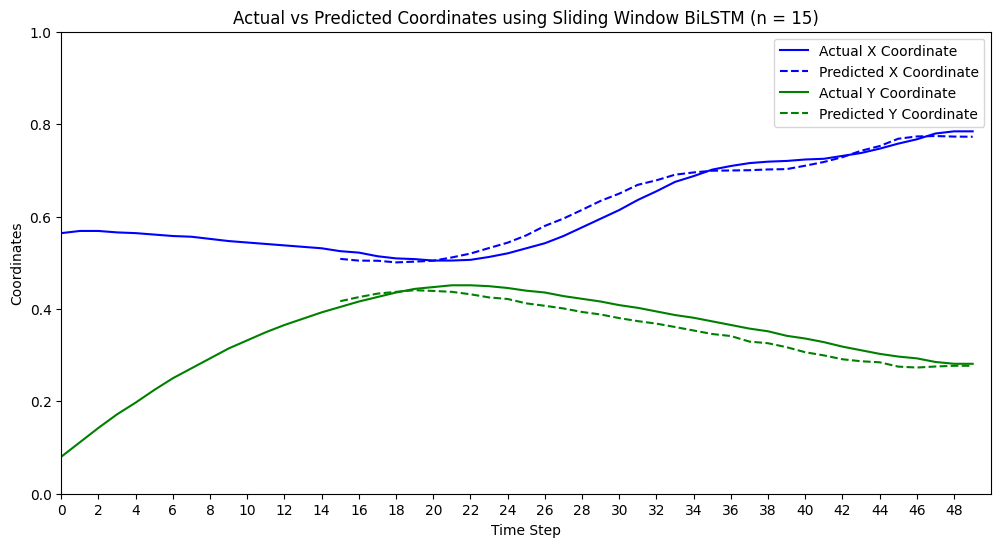

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(12, 6))
x_ticks = range(0, len(X), 2)
plt.plot(df.index, X, label='Actual X Coordinate', color='blue')
plt.plot(df.index[window_size:], predicted_X_coordinates, label='Predicted X Coordinate', linestyle='--', color='blue')
plt.plot(df.index, Y, label='Actual Y Coordinate', color='green')
plt.plot(df.index[window_size:], predicted_Y_coordinates, label='Predicted Y Coordinate', linestyle='--', color='green')

plt.xlabel('Time Step')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates using Sliding Window BiLSTM (n = 15)')
plt.xticks(x_ticks)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_1_n15.png', transparent=True)

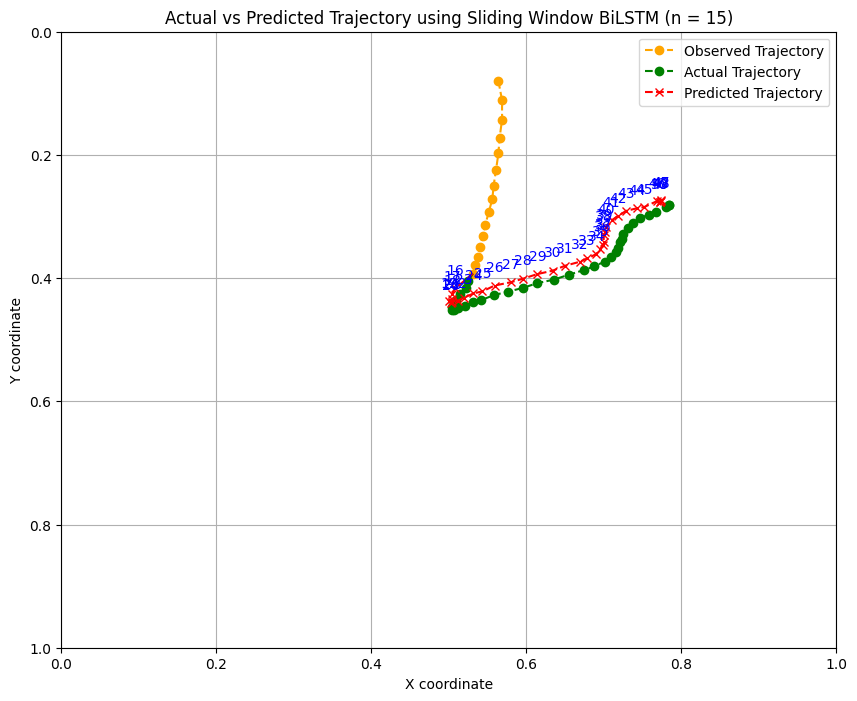

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

# Annotate the predicted points with sequential numbers
for i, (x, y) in enumerate(zip(predicted_X_coordinates, predicted_Y_coordinates), start=16):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_2_n15.png', transparent=True)

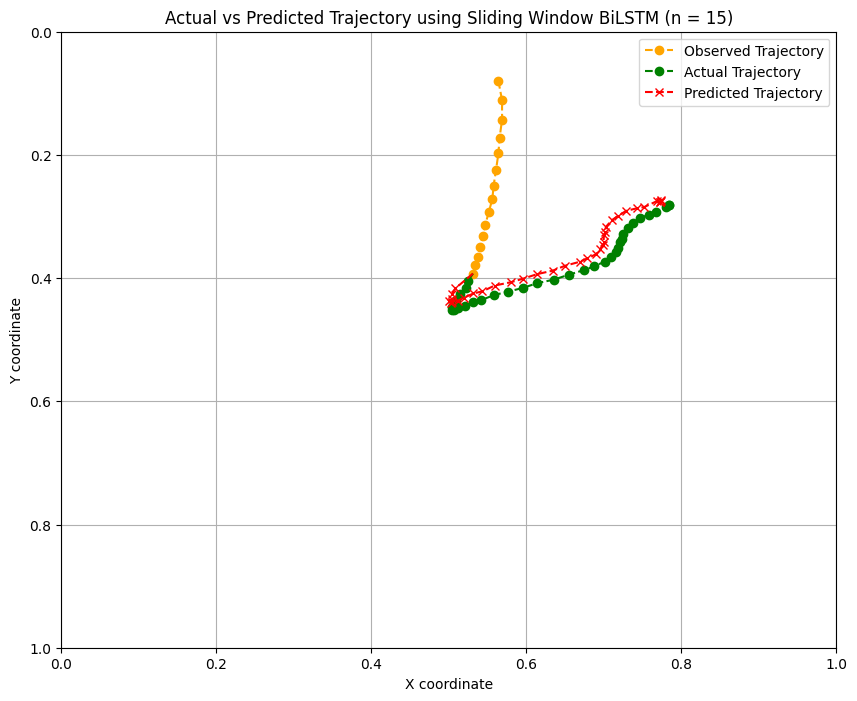

In [ ]:
# Plot the true and predicted coordinates
plt.figure(figsize=(10, 8))

predicted_X_coordinates = predicted_X_coordinates.ravel()
predicted_Y_coordinates = predicted_Y_coordinates.ravel()

# Plot the ground truth
plt.plot(X[:15], Y[:15], marker='o', color='orange', linestyle='--', label='Observed Trajectory')
plt.plot(X[14:16], Y[14:16], color='green', linestyle='--')
plt.plot(X[15:], Y[15:], marker='o', color='green', linestyle='--', label='Actual Trajectory')
plt.plot([X[14], predicted_X_coordinates[0]], [Y[14], predicted_Y_coordinates[0]], color='red', linestyle='--')

# Plot the predicted coordinates
plt.plot(predicted_X_coordinates, predicted_Y_coordinates, label='Predicted Trajectory', color='red', linestyle='--', marker='x')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Actual vs Predicted Trajectory using Sliding Window BiLSTM (n = 15)')
plt.xlim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.ylim(0, 1)  # Assuming coordinates are normalized (0 to 1)
plt.gca().invert_yaxis()  # YOLO format typically has y-axis inverted
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('/content/gdrive/MyDrive/FYP_Drone/ObjectTracking/Plot_Videos/IR_128_3_n15.png', transparent=True)